### Question 4.b 
(2 points) Start with the code for polynomial regression from the tutorial (the code without
in-built package functions in Tutorial #8) and add quadratic regularization functionality to the
code. That is, your code should do polynomial regression with quadratic regularization that
takes degree d and regularization parameter λ as input. Do not use any inbuilt functions from
Python packages (except for plotting functions and functions to compute polynomial features
for each data point).

In [4]:
# Importing all the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
def polyregression(Data,reg_parameter,degree):

    """

        Arguments:
        Data: Dataset (passed as a pandas dataframe)
        reg_parameter: regularization parameter
        Degree: Degree of the polynomial

        output: weights

        return weights

    """

    train_X = Data.iloc[:,0]
    train_Y = Data.iloc[:,1]



    design_matrix = np.asarray([[np.power(train_X[i], j) for j in range(degree + 1)] for i in range(len(train_X))])
    Identity_matrix = np.identity(degree + 1)
    weights = np.linalg.pinv(np.transpose(design_matrix) @ design_matrix + reg_parameter * Identity_matrix) @ (np.transpose(design_matrix)) @ train_Y


    return weights , design_matrix

### Question 4.c
Run your code on the provided dataset for degree d = 24 and each λ in the set:

{10^{-15}, 10^{-9}, 10^{-6}, 10^{-3}, 10^{-2}, 10^{-1}, 1, 10^{1}, 10^{2}, 10^{3}, 10^{6}, 10^{9}, 10^{15}}

i. Perform 5-fold cross-validation on the 100 data points (20 data points in each fold). For
each validation fold, compute both training (4-fold-based) and validation (1-fold-based)
errors using the mean squared error measure.


In [7]:
reg_parameter_value = [10**-15, 10**-9, 10**-6, 10**-3, 10**-2, 10**-1, 1, 10**1, 10**2, 10**3, 10**6, 10**9, 10**15]
datapath = 'bayes_variance_data.csv'
data_pd = pd.read_csv(datapath, sep=',', dtype=float)
data_pd


,x,y
0,0.548814,0.376125
1,0.715189,2.127535
2,0.602763,1.888617
3,0.544883,0.014425
4,0.423655,3.397907
...,...,...
95,0.183191,4.212776
96,0.586513,0.653227
97,0.020108,7.636322
98,0.828940,0.620963


In [8]:
# Ref : https://medium.com/@avijit.bhattacharjee1996/implementing-k-fold-cross-validation-from-scratch-in-python-ae413b41c80d

def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))

    # print(folds[0])
    return folds




In [9]:
fold_indices = kfold_indices(data_pd,5)

In [10]:
data_pd_to_np = data_pd.to_numpy()

In [11]:
error_dict = {}
total_error_train , total_error_test = [] ,[]
reg_parameter_value = [1e-15, 1e-9, 1e-6, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e6, 1e9, 1e15]
for reg_parameter in reg_parameter_value:
    for train_indices, test_indices in fold_indices:
        Train_data = pd.DataFrame(data_pd_to_np[train_indices])   # Converting my data to dataframe because , this is the my required form of input
        Test_data = pd.DataFrame(data_pd_to_np[test_indices])
        
        Train_data_weights , design_matrix_train = polyregression(Train_data,reg_parameter,degree=24)
        # print('Train_data_weights',Train_data_weights.shape)
        # print('Design_mat_train',design_matrix_train.shape)

        Test_data_weights , design_matrix_test = polyregression(Test_data,reg_parameter,degree=24) 
        # print('Test_data_weights',Test_data_weights.shape)
        # print('Design_mat_test',design_matrix_test.shape)

        # print('Train_data_weights',Train_data_weights.shape)
        # print('design_matrix',design_matrix_train.shape)

        prediction_train = design_matrix_train @ Train_data_weights
        error_train = (Train_data.iloc[:,1] - prediction_train) ** 2
        # total_error_train.append(np.sum(error_train))
        total_error_train.append((error_train))



        prediction_test = design_matrix_test @ Train_data_weights
        error_test = (Test_data.iloc[:,1] - prediction_test) ** 2
        # total_error_test.append(np.sum(error_test))
        total_error_test.append((error_test))

    

    error_dict[reg_parameter] = {'total_error_train': np.sum(total_error_train), 
                                'total_error_test': np.sum(total_error_test),
                                'average_training_error':np.mean(total_error_train),
                                'average_test_error':np.mean(total_error_test)}

    # print('error_train',total_error_train)
    # print('error_test',total_error_test)

for reg_param, errors in error_dict.items():
    print(f"Reg Parameter: {reg_param},\n"
          f"Total Error Train: {errors['total_error_train']},\n"
          f"Total Error Test: {errors['total_error_test']},\n"
          f"Average Training Error: {errors['average_training_error']},\n"
          f"Average Test Error: {errors['average_test_error']}\n")
    



Reg Parameter: 1e-15,
Total Error Train: 354.5249243168607,
Total Error Test: 224.22447669633252,
Average Training Error: 0.8863123107921517,
Average Test Error: 2.242244766963325

Reg Parameter: 1e-09,
Total Error Train: 716.5005461659387,
Total Error Test: 371.86158962334474,
Average Training Error: 0.8956256827074234,
Average Test Error: 1.8593079481167236

Reg Parameter: 1e-06,
Total Error Train: 1088.0643602643368,
Total Error Test: 492.047641945537,
Average Training Error: 0.9067203002202806,
Average Test Error: 1.6401588064851234

Reg Parameter: 0.001,
Total Error Train: 1498.0709377020405,
Total Error Test: 612.2924661819529,
Average Training Error: 0.9362943360637753,
Average Test Error: 1.5307311654548823

Reg Parameter: 0.01,
Total Error Train: 1945.3794905671941,
Total Error Test: 743.1274161050316,
Average Training Error: 0.9726897452835971,
Average Test Error: 1.486254832210063

Reg Parameter: 0.1,
Total Error Train: 2472.1221318051785,
Total Error Test: 893.8986031286177

### Question 4.d

Construct a learning curve by plotting the average training and validation errors
against the model complexity (log10 λ). Based on this learning curve, identify the (i) model
with the highest bias, (ii) model with the highest variance?, and (iii) the model that will work
best on some unseen data.

[1e-15, 1e-09, 1e-06, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 1000000.0, 1000000000.0, 1000000000000000.0]


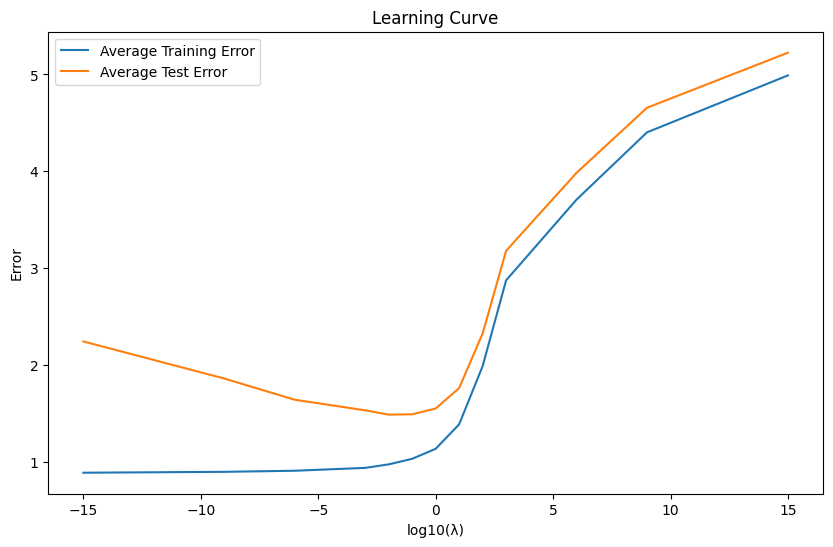

In [12]:
import matplotlib.pyplot as plt
reg_parameters = list(error_dict.keys())
print(reg_parameters)
average_training_errors = [errors['average_training_error'] for errors in error_dict.values()]
average_test_errors = [errors['average_test_error'] for errors in error_dict.values()]

plt.figure(figsize=(10, 6))
plt.plot(np.log10(reg_parameters), average_training_errors, label='Average Training Error')
plt.plot(np.log10(reg_parameters), average_test_errors, label='Average Test Error')
plt.xlabel('log10(λ)')
plt.ylabel('Error')
plt.title('Learning Curve')
plt.legend()
plt.savefig('./plots/Learning_curve.jpg')
plt.show()

### Question 4.e
Plot the fitted curve to the given data ( ˆy against x curve) for the three models re-
ported in part (d) and superimposed with the training and validation data points for any one-
fold.

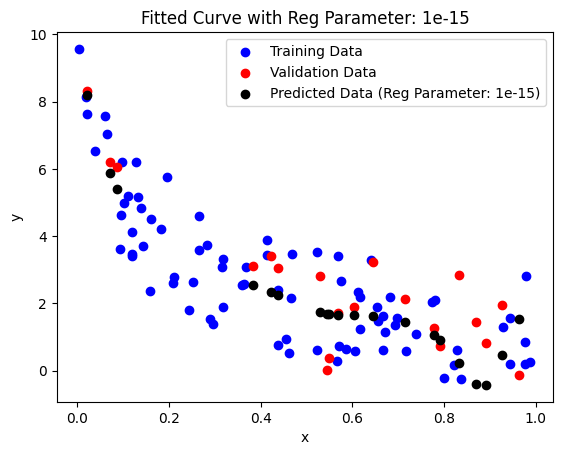

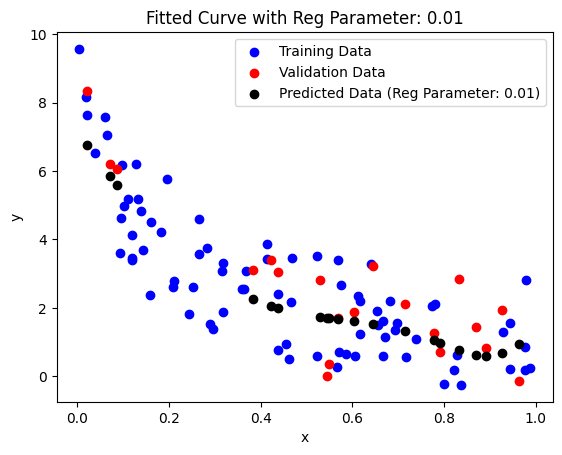

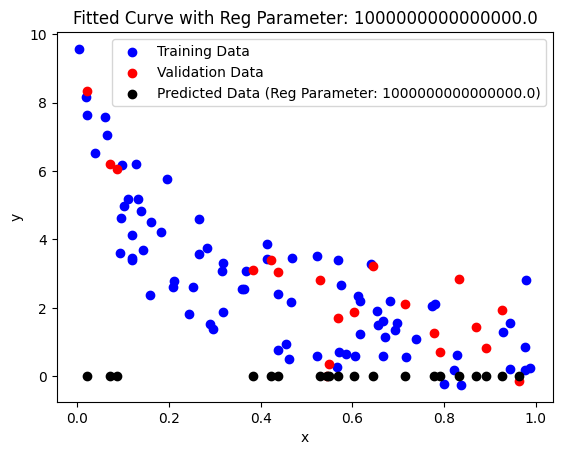

In [13]:

train_indices, test_indices = fold_indices[0]
Train_data_new = pd.DataFrame(data_pd_to_np[train_indices])
Test_data_new = pd.DataFrame(data_pd_to_np[test_indices])



x_train, y_train = Train_data_new.iloc[:, 0], Train_data_new.iloc[:, 1]
x_test, y_test = Test_data_new.iloc[:, 0], Test_data_new.iloc[:, 1]

reg_parameter_value = [1e-15, 0.01, 1e15]

for reg_parameter in reg_parameter_value:
    Train_data_weights_new, design_matrix_train = polyregression(Train_data_new, reg_parameter, degree=24)
    Test_data_weights_new, design_matrix_test_new = polyregression(Test_data_new, reg_parameter, degree=24) 
    
    y_pred_test = design_matrix_test_new @ Train_data_weights_new

    plt.figure()
    
    plt.scatter(x_train, y_train, label='Training Data', color='blue')
    plt.scatter(x_test, y_test, label='Validation Data', color='red')
    plt.scatter(x_test, y_pred_test, label=f'Predicted Data (Reg Parameter: {reg_parameter})', color='black')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Fitted Curve with Reg Parameter: {reg_parameter}')
    plt.legend()
    plt.savefig(f'plots/Fitted Curve with Reg Parameter:{reg_parameter}.jpg')
    plt.show()


    
